# Old texts vs New texts

## Libraries used

In [41]:
import pandas as pd
import os
import numpy as np

In [26]:
!python -m spacy download es_core_news_sm


Error processing line 3 of /Users/isaacfernandez/opt/anaconda3/lib/python3.9/site-packages/googleapis_common_protos-1.56.3-py3.10-nspkg.pth:

  Traceback (most recent call last):
    File "/Users/isaacfernandez/opt/anaconda3/lib/python3.9/site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 562, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
Error processing line 3 of /Users/isaacfernandez/opt/anaconda3/lib/python3.9/site-packages/googleapis_common_protos-1.56.3-py3.10-nspkg.pth:

  Traceback (most recent call last):
    File "/Users/isaacfernandez/opt/anaconda3/lib/python3.9/site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 562, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
     ━━━━━━━━━━━

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [23]:
from collections import Counter
import spacy

## Reading the texts

In [11]:
import os

def read_all_txts_in_directory(directory_path):
    # Dictionary to store the contents of each file
    file_contents = {}
    
    # Check if the directory exists
    if not os.path.isdir(directory_path):
        raise ValueError(f"The directory {directory_path} does not exist.")
    
    # Loop through all files in the directory
    for filename in os.listdir(directory_path):
        # Check if the file is a TXT file
        if filename.endswith(".txt"):
            file_path = os.path.join(directory_path, filename)
            try:
                # Open and read the TXT file
                with open(file_path, 'r', encoding='latin-1') as file:
                    content = file.read()
                # Store the content in the dictionary with the filename as the key
                file_contents[filename] = content
                print(f"Successfully read: {filename}")  # Debug print
            except Exception as e:
                print(f"Error reading {filename}: {e}")
        else:
            print(f"Skipped non-txt file: {filename}")  # Debug for non-txt files
    
    return file_contents

# Define your directory path
directory_path = '/Users/isaacfernandez/Documents/Servicio Social/Textos Limpios'

# Read all TXT files into a dictionary
txt_file_contents = read_all_txts_in_directory(directory_path)

# Check if we actually read anything
if txt_file_contents:
    # Print the content of the dictionary to verify
    for filename, content in txt_file_contents.items():
        print(f"Contents of {filename}:\n{content[:100]}...")  # Print only the first 100 characters for each file
else:
    print("No TXT files were found in the directory.")
 # Print only the first 100 characters for each file


Successfully read: La playa bajo la calle - Mckenzie Wark.txt
Successfully read: Recuerdos intimos de la guerra del Pacifico - Alberto del Solar.txt
Successfully read: Diario de un soldado en la independencia - Santos Vargas.txt
Successfully read: Correspondencia Secreta - Garcia G.txt
Successfully read: Diario de Campaña durante la guerra civil española - Sanchez Cerbera.txt
Successfully read: Diario - Jose Miguel Cabrera.txt
Successfully read: Escritos inéditos Gaspar de Jovellanos.txt
Successfully read: Memorias - Roman Polanski.txt
Successfully read: Lucas Alaman - Andres Lira.txt
Successfully read: Antes de que Anochezca - Reinaldo Arenas.txt
Successfully read: Mexico Insurgente - John Reed.txt
Successfully read: Diario - Angel Rivero Mendez .txt
Successfully read: Mi vision del mundo - Albert Einstein.txt
Successfully read: Cartas de un norte americano - Servando Teresa de Mier.txt
Successfully read: Memorias de un revolucionario - Victor Serge.txt
Successfully read: Memorias 

In [14]:
len(txt_file_contents.keys())


35

In [16]:
txt_file_contents.keys()

dict_keys(['La playa bajo la calle - Mckenzie Wark.txt', 'Recuerdos intimos de la guerra del Pacifico - Alberto del Solar.txt', 'Diario de un soldado en la independencia - Santos Vargas.txt', 'Correspondencia Secreta - Garcia G.txt', 'Diario de Campaña durante la guerra civil española - Sanchez Cerbera.txt', 'Diario - Jose Miguel Cabrera.txt', 'Escritos inéditos Gaspar de Jovellanos.txt', 'Memorias - Roman Polanski.txt', 'Lucas Alaman - Andres Lira.txt', 'Antes de que Anochezca - Reinaldo Arenas.txt', 'Mexico Insurgente - John Reed.txt', 'Diario - Angel Rivero Mendez .txt', 'Mi vision del mundo - Albert Einstein.txt', 'Cartas de un norte americano - Servando Teresa de Mier.txt', 'Memorias de un revolucionario - Victor Serge.txt', 'Memorias de un francotirador en Stalingrado - Vasili Zaitsev.txt', 'Memorias de un soldado cubano - Dariel Alarcon Ramirez.txt', 'Juventud en Viena - Arthur Schnitzler.txt', 'Diarios Amorosos - Anais Nin.txt', 'Un ruso blanco en la división azul - Vladimi

## Handling recent spanish

Now, we will extract text from recent best selling books in Spanish.

In [17]:
booksPath= '/Users/isaacfernandez/Documents/Servicio Social/NewSpanish'
recentSpanish = read_all_txts_in_directory(booksPath)

Successfully read: LibroAlasdeSangreRebeccaYarros.txt
Successfully read: Nosotrosenlaluna.txt
Successfully read: Gracias- AMLO.txt
Successfully read: Romper el circulo.txt
Successfully read: ComoHacerQueTePasenCosasBuenas.txt


In [18]:
recentSpanish.keys()

dict_keys(['LibroAlasdeSangreRebeccaYarros.txt', 'Nosotrosenlaluna.txt', 'Gracias- AMLO.txt', 'Romper el circulo.txt', 'ComoHacerQueTePasenCosasBuenas.txt'])

## Selecting 5 texts

In [21]:
picks = [
    'Diario - Jose Miguel Cabrera.txt',
    'Diario de campo en Melanesia - B. Malinowski.txt',
    'Diario de Campaña durante la guerra civil española - Sanchez Cerbera.txt',
    'Diario de un soldado en la independencia - Santos Vargas.txt',
    'Diario - Angel Rivero Mendez .txt'
]


selected_txts = {key: txt_file_contents[key] for key in picks if key in txt_file_contents}



In [29]:
# Load the Spanish language model from spaCy
nlp = spacy.load("es_core_news_sm")
nlp.max_length = 1500000 



Top 10 words in Recent Spanish: [('estã', 73), ('vida', 54), ('ã', 52), ('s', 41), ('mira', 39), ('quã', 39), ('mã', 36), ('tabasco', 35), ('ojos', 34), ('n', 34), ('gente', 34)]
Top 10 words in Selected Texts: [('i', 2919), ('don', 2628), ('pueblo', 1255), ('comandante', 1145), ('enemigo', 1084), ('hombres', 965), ('noche', 808), ('lira', 679), ('general', 675), ('casa', 640), ('patria', 568)]


## Word frecuency comparison.

In [30]:
from collections import Counter
import string
import nltk

# Download stopwords for Spanish
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Define Spanish stopwords
stop_words = set(stopwords.words('spanish'))

# Function to process text: tokenize, remove stop words and punctuation, and filter single characters
def process_text_nltk(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove punctuation, stopwords, and filter out single character tokens
    words = [word for word in tokens if word.isalpha() and len(word) > 1 and word not in stop_words]
    return words

# Assuming recentSpanish and selected_txts are dictionaries with text values
def compute_word_frequency(text_dict):
    total_words = []
    for key, text in text_dict.items():
        words = process_text_nltk(text)
        total_words.extend(words)
    
    # Count the word frequencies
    word_freq = Counter(total_words)
    return word_freq


# Compute word frequencies for both dictionaries
recent_freq = compute_word_frequency(recentSpanish)
selected_freq = compute_word_frequency(selected_txts)




[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/isaacfernandez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 words in Recent Spanish: [('si', 77), ('ser', 69), ('vida', 54), ('solo', 51), ('hacia', 45), ('mira', 39), ('mientras', 39), ('tan', 35), ('tabasco', 35), ('ojos', 34)]
Top 10 words in Selected Texts: [('don', 2628), ('pueblo', 1255), ('comandante', 1145), ('enemigo', 1083), ('hombres', 965), ('noche', 808), ('luego', 780), ('dos', 766), ('mismo', 722), ('lira', 679)]


In [34]:
# Display the top 10 most common words in each
print("Top 20 words in Recent Spanish:", recent_freq.most_common(20),"\n")
print("Top 20 words in Selected Texts:", selected_freq.most_common(20))

Top 20 words in Recent Spanish: [('si', 77), ('ser', 69), ('vida', 54), ('solo', 51), ('hacia', 45), ('mira', 39), ('mientras', 39), ('tan', 35), ('tabasco', 35), ('ojos', 34), ('gente', 34), ('vez', 32), ('felicidad', 31), ('puede', 29), ('tiempo', 28), ('bien', 27), ('aunque', 27), ('mochila', 26), ('nunca', 26), ('siempre', 25)] 

Top 20 words in Selected Texts: [('don', 2628), ('pueblo', 1255), ('comandante', 1145), ('enemigo', 1083), ('hombres', 965), ('noche', 808), ('luego', 780), ('dos', 766), ('mismo', 722), ('lira', 679), ('general', 675), ('casa', 641), ('toda', 599), ('bien', 574), ('patria', 569), ('así', 546), ('si', 533), ('coronel', 528), ('indios', 512), ('tarde', 511)]


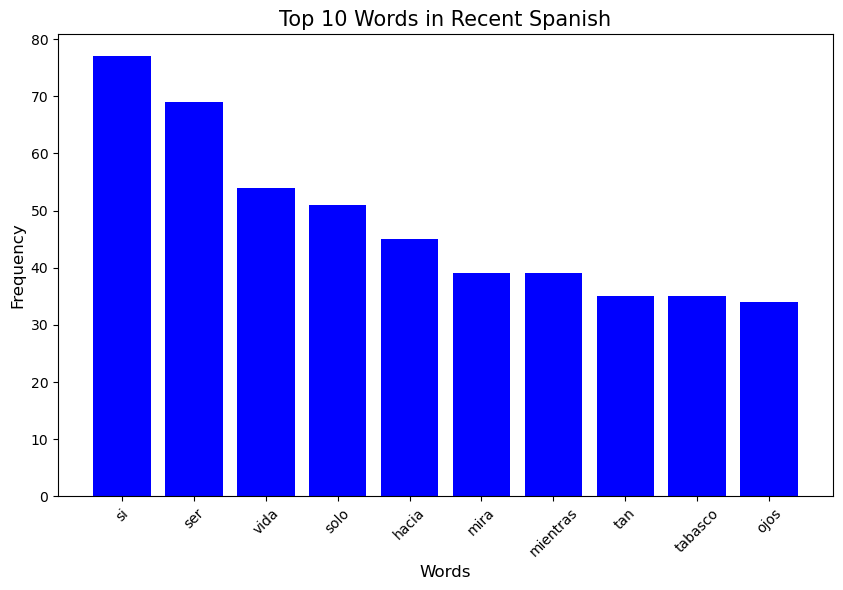

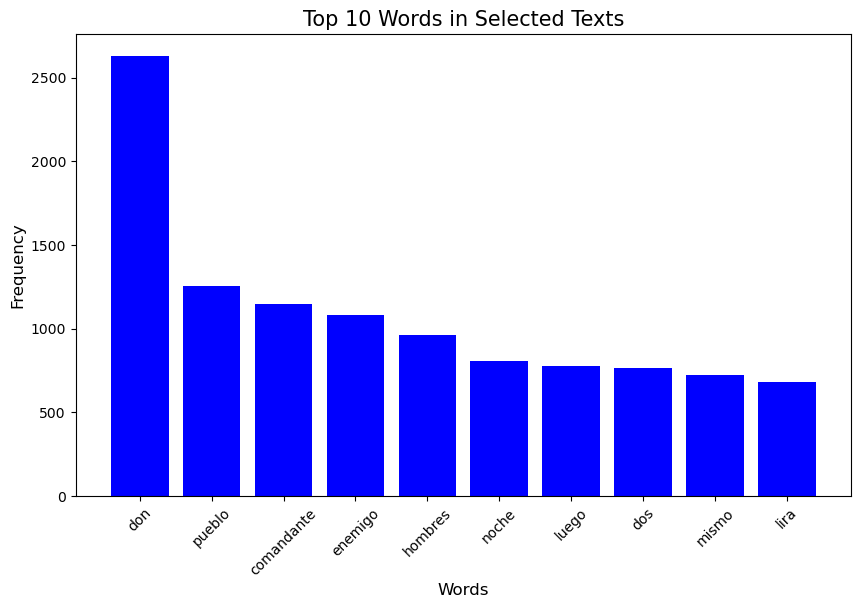

In [35]:
import matplotlib.pyplot as plt

# Function to plot word frequency
def plot_word_frequency(word_freq, title):
    # Get the top 10 most common words and their counts
    words, counts = zip(*word_freq.most_common(10))

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='blue')
    plt.xlabel('Words', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(title, fontsize=15)
    plt.xticks(rotation=45)
    plt.show()

# Plot word frequencies for recent Spanish and selected texts
plot_word_frequency(recent_freq, 'Top 10 Words in Recent Spanish')
plot_word_frequency(selected_freq, 'Top 10 Words in Selected Texts')


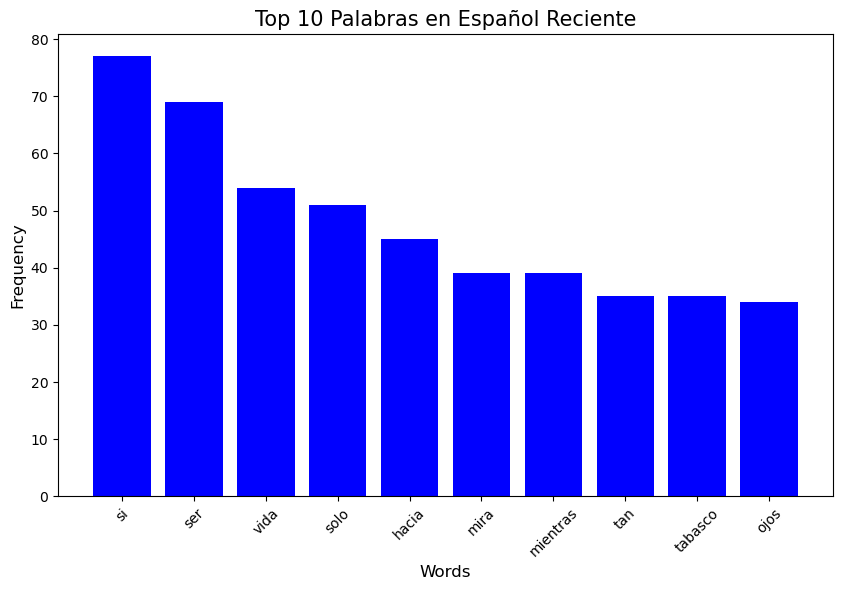

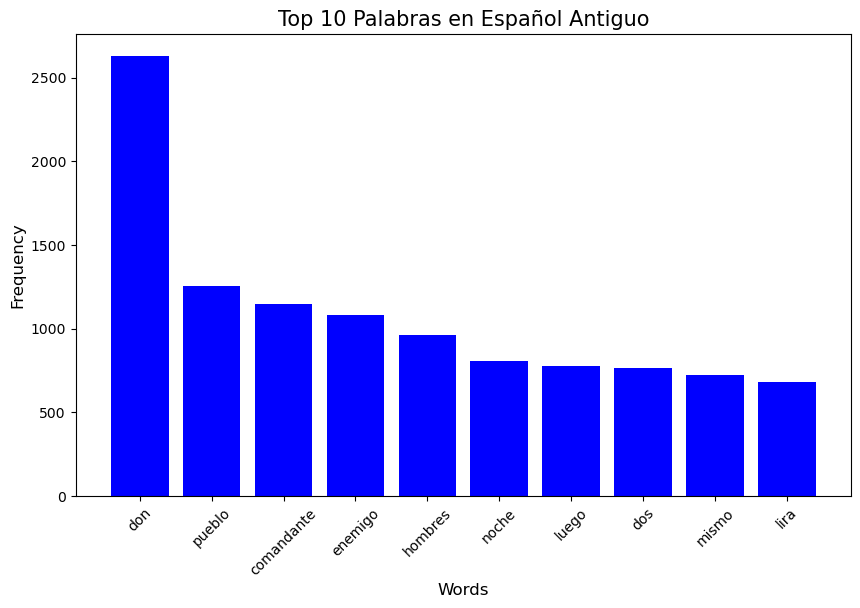

In [50]:
# Plot word frequencies for recent Spanish and selected texts
plot_word_frequency(recent_freq, 'Top 10 Palabras en Español Reciente')
plot_word_frequency(selected_freq, 'Top 10 Palabras en Español Antiguo')

## POS comparison

In [44]:

# Function to perform POS analysis
def pos_analysis(text_dict):
    pos_tags = []
    for key, text in text_dict.items():
        doc = nlp(text)
        pos_tags.extend([token.pos_ for token in doc])  # Collect POS tags for the entire text
    pos_freq = Counter(pos_tags)
    return pos_freq

# Perform POS analysis on both sets of texts
old_pos_freq = pos_analysis(selected_txts)
new_pos_freq = pos_analysis(recentSpanish)

# Print the results
print("Old Spanish POS:", old_pos_freq)
print("New Spanish POS:", new_pos_freq)



Old Spanish POS: Counter({'NOUN': 84372, 'ADP': 72761, 'DET': 58712, 'PUNCT': 53681, 'VERB': 50386, 'PROPN': 47922, 'PRON': 31334, 'ADJ': 25157, 'SPACE': 21984, 'ADV': 17191, 'CCONJ': 16569, 'AUX': 11163, 'SCONJ': 9349, 'NUM': 8969, 'INTJ': 226, 'SYM': 187, 'PART': 46, 'X': 5})
New Spanish POS: Counter({'NOUN': 5417, 'ADP': 3978, 'DET': 3655, 'PUNCT': 3580, 'VERB': 3407, 'SPACE': 2211, 'PROPN': 2205, 'PRON': 2097, 'ADJ': 2021, 'ADV': 1069, 'CCONJ': 1021, 'AUX': 1017, 'SCONJ': 865, 'NUM': 352, 'INTJ': 33, 'SYM': 21, 'PART': 5})


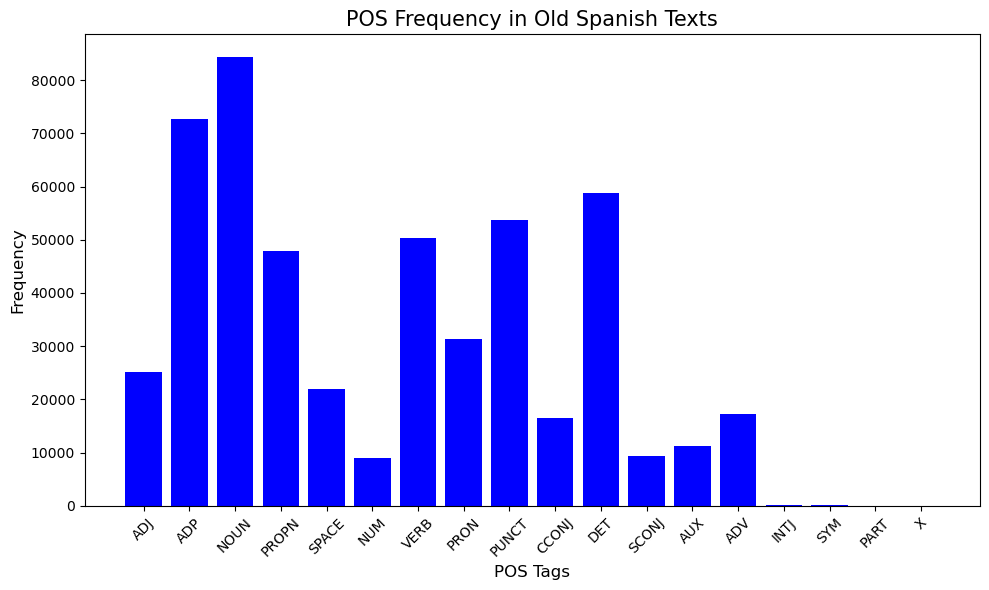

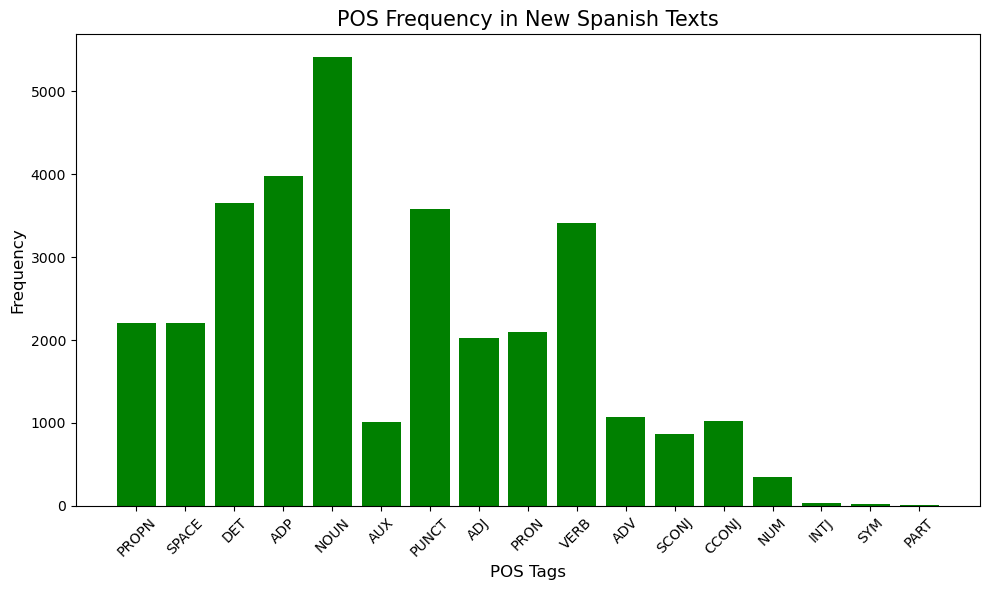

In [46]:
import matplotlib.pyplot as plt

# Function to plot POS frequencies separately
def plot_pos_frequencies_separate(pos_freq, title, color):
    pos_tags, counts = zip(*pos_freq.items())
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.bar(pos_tags, counts, color=color)
    plt.xlabel('POS Tags', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(title, fontsize=15)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot for Old Spanish
plot_pos_frequencies_separate(old_pos_freq, 'POS Frequency in Old Spanish Texts', color='blue')

# Plot for New Spanish
plot_pos_frequencies_separate(new_pos_freq, 'POS Frequency in New Spanish Texts', color='green')


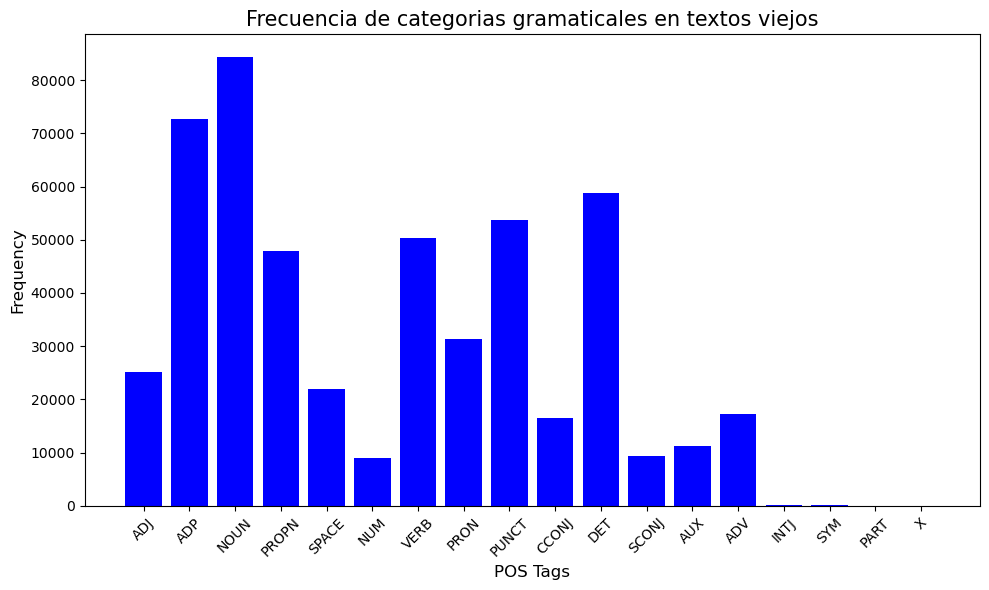

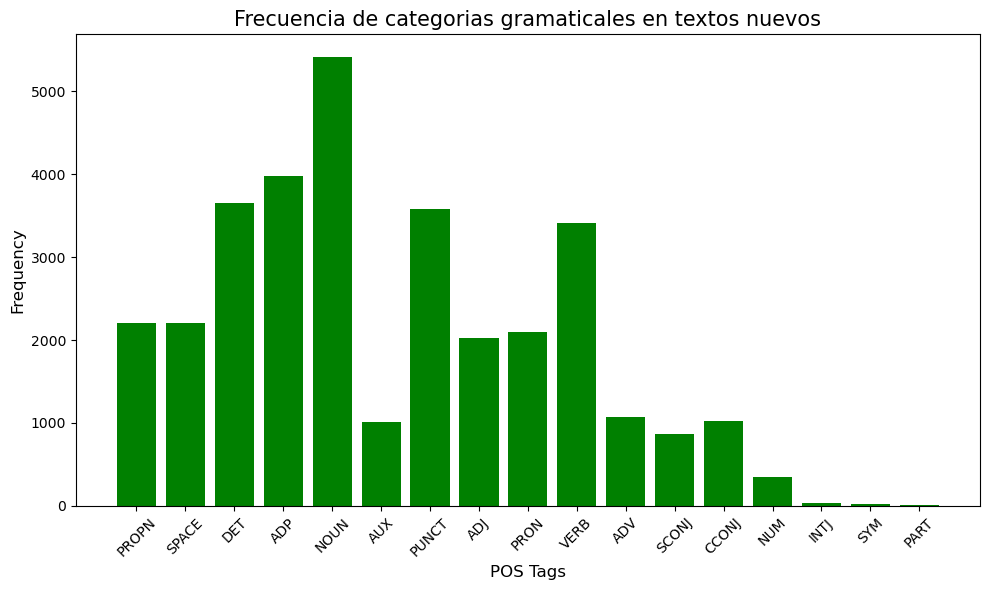

In [51]:
# Plot for Old Spanish
plot_pos_frequencies_separate(old_pos_freq, 'Frecuencia de categorias gramaticales en textos viejos', color='blue')

# Plot for New Spanish
plot_pos_frequencies_separate(new_pos_freq, 'Frecuencia de categorias gramaticales en textos nuevos', color='green')


## NER Comparison

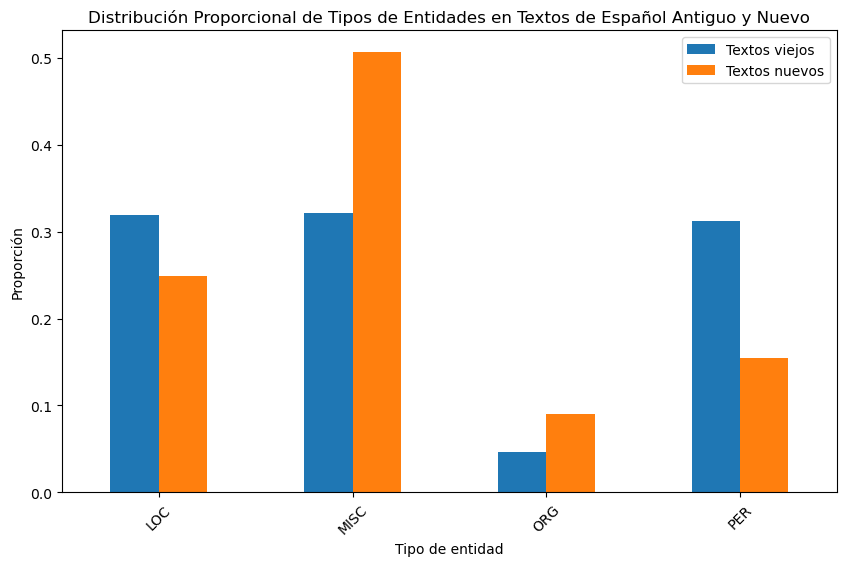

In [54]:


# Function to perform NER analysis on a dictionary of texts
def ner_analysis(text_dict):
    entities = []
    for key, text in text_dict.items():
        doc = nlp(text)
        entities.extend([(ent.text, ent.label_) for ent in doc.ents])  # Collect entities from the document
    return entities

# Perform NER analysis on both dictionaries
old_ner = ner_analysis(selected_txts)
new_ner = ner_analysis(recentSpanish)

# Convert to DataFrames
old_ner_df = pd.DataFrame(old_ner, columns=["Entity", "Label"])
new_ner_df = pd.DataFrame(new_ner, columns=["Entity", "Label"])

# Count entity types for each dataset
old_ner_counts = Counter(old_ner_df['Label'])
new_ner_counts = Counter(new_ner_df['Label'])

# Calculate the total number of entities in each dataset
total_old_entities = len(old_ner_df)
total_new_entities = len(new_ner_df)

# Normalize the counts to get proportions
old_ner_proportions = {label: count / total_old_entities for label, count in old_ner_counts.items()}
new_ner_proportions = {label: count / total_new_entities for label, count in new_ner_counts.items()}

# Convert proportions to DataFrame for easy plotting
old_ner_proportions_df = pd.DataFrame.from_dict(old_ner_proportions, orient='index', columns=['Textos viejos'])
new_ner_proportions_df = pd.DataFrame.from_dict(new_ner_proportions, orient='index', columns=['Textos nuevos'])

# Merge the two DataFrames for comparison
entity_proportions_df = pd.merge(old_ner_proportions_df, new_ner_proportions_df, left_index=True, right_index=True, how='outer').fillna(0)

# Plotting proportional counts
entity_proportions_df.plot(kind='bar', figsize=(10, 6))
plt.title('Distribución Proporcional de Tipos de Entidades en Textos de Español Antiguo y Nuevo')
plt.xlabel('Tipo de entidad')
plt.ylabel('Proporción')
plt.xticks(rotation=45)
plt.show()





## Sentence Length

Old Spanish Avg Sentence Length: 26.176041880517346
New Spanish Avg Sentence Length: 20.279384615384615


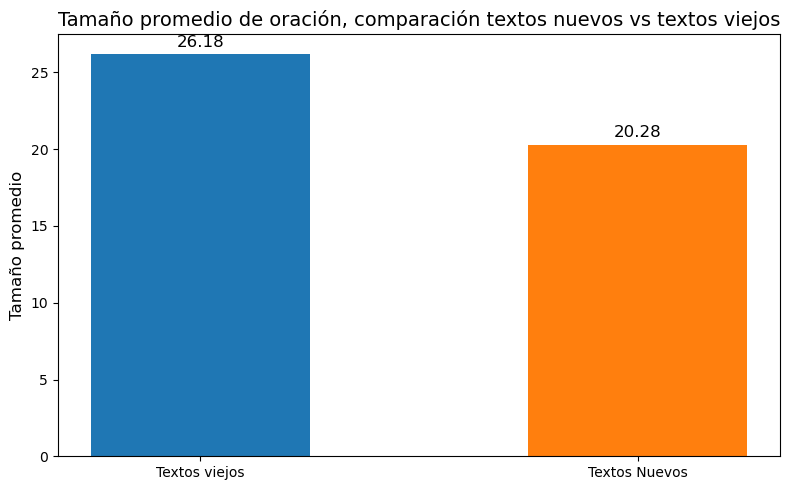

In [56]:


# Function to perform sentence length analysis on a dictionary of texts
def sentence_length_analysis(text_dict):
    sentence_lengths = []
    for key, text in text_dict.items():
        doc = nlp(text)
        # Collect sentence lengths for each document
        sentence_lengths.extend([len(sent) for sent in doc.sents])
    return sentence_lengths

# Perform sentence length analysis on both dictionaries
old_sentence_lengths = sentence_length_analysis(selected_txts)
new_sentence_lengths = sentence_length_analysis(recentSpanish)

# Calculate average sentence lengths
old_avg_sentence_length = sum(old_sentence_lengths) / len(old_sentence_lengths)
new_avg_sentence_length = sum(new_sentence_lengths) / len(new_sentence_lengths)

# Print the average sentence lengths
print("Old Spanish Avg Sentence Length:", old_avg_sentence_length)
print("New Spanish Avg Sentence Length:", new_avg_sentence_length)

# Prepare data for plotting
labels = ['Textos viejos', 'Textos Nuevos']
avg_sentence_lengths = [old_avg_sentence_length, new_avg_sentence_length]

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, avg_sentence_lengths, color=['#1f77b4', '#ff7f0e'], width=0.5)

# Add titles and labels
plt.title('Tamaño promedio de oración, comparación textos nuevos vs textos viejos', fontsize=14)
plt.ylabel('Tamaño promedio', fontsize=12)


# Display values on top of bars
for i, v in enumerate(avg_sentence_lengths):
    plt.text(i, v + 0.5, f"{v:.2f}", ha='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()




## N-grams


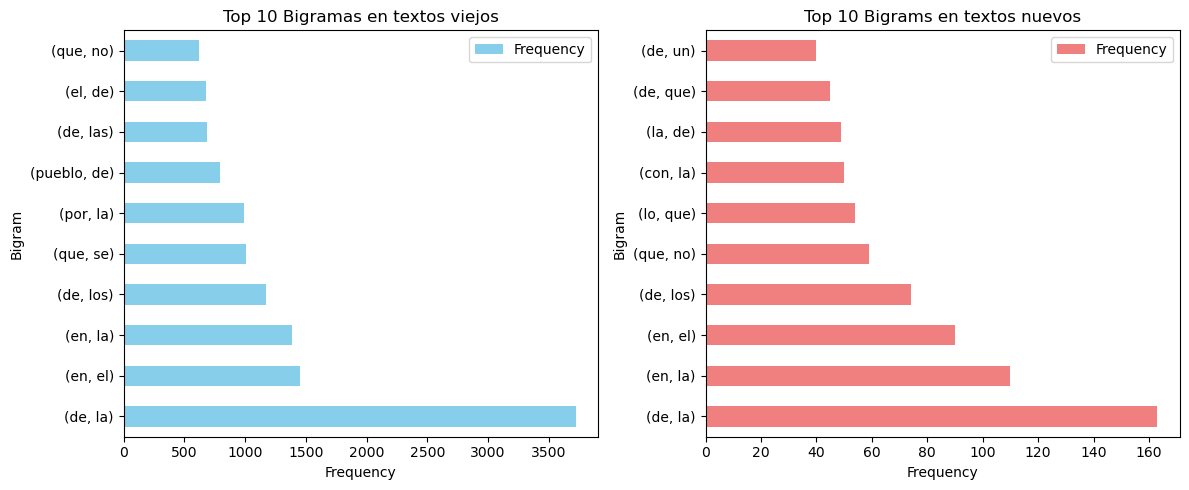

In [58]:


# Function to extract n-grams and count their frequency
def extract_ngram_frequencies(text_dict, n=2):
    all_ngrams = extract_ngrams(text_dict, n)
    ngram_freq = Counter(all_ngrams)
    return ngram_freq

# Extract bigram frequencies for both Old Spanish and New Spanish
old_bigram_freq = extract_ngram_frequencies(selected_txts, n=2)
new_bigram_freq = extract_ngram_frequencies(recentSpanish, n=2)

# Get the most common bigrams (top 10) for both sets
old_top_bigrams = old_bigram_freq.most_common(10)
new_top_bigrams = new_bigram_freq.most_common(10)

# Convert the data to DataFrame for easier plotting
old_bigrams_df = pd.DataFrame(old_top_bigrams, columns=['Bigram', 'Frequency'])
new_bigrams_df = pd.DataFrame(new_top_bigrams, columns=['Bigram', 'Frequency'])

# Plotting the top 10 bigrams for Old Spanish
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
old_bigrams_df.plot(kind='barh', x='Bigram', y='Frequency', ax=plt.gca(), color='skyblue')
plt.title('Top 10 Bigramas en textos viejos')
plt.xlabel('Frequency')
plt.ylabel('Bigram')

# Plotting the top 10 bigrams for New Spanish
plt.subplot(1, 2, 2)
new_bigrams_df.plot(kind='barh', x='Bigram', y='Frequency', ax=plt.gca(), color='lightcoral')
plt.title('Top 10 Bigrams en textos nuevos')
plt.xlabel('Frequency')
plt.ylabel('Bigram')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

